### Pendahuluan

Peramalan harga saham merupakan salah satu topik yang sangat menarik dalam dunia keuangan dan investasi. Memprediksi harga saham yang akan datang dapat memberikan keuntungan yang signifikan bagi investor, terutama dalam mengidentifikasi tren pasar dan mengambil keputusan yang lebih tepat. Seiring dengan perkembangan teknologi, metode-metode peramalan tradisional kini semakin digantikan oleh pendekatan berbasis kecerdasan buatan (AI), terutama yang melibatkan model-model pembelajaran mendalam seperti **Long Short-Term Memory (LSTM)**.

LSTM adalah jenis jaringan saraf tiruan yang mampu menangani data berurutan (sequential data) dengan sangat baik. Dalam konteks peramalan harga saham, data historis seperti harga pembukaan (Open) dan harga tertinggi (High) menjadi input penting untuk memprediksi harga pada periode mendatang. Keunggulan utama dari LSTM adalah kemampuannya untuk menangani dependensi jangka panjang dalam data, yang penting dalam analisis data time series seperti harga saham.

Pada penelitian ini, kami menggunakan model LSTM untuk memprediksi harga saham dari perusahaan **Sawit Sumbermas Sarana**, berdasarkan dua fitur utama: **harga pembukaan (Open)** dan **harga tertinggi (High)**. Model ini dilatih menggunakan data historis harga saham perusahaan tersebut, dan kemudian digunakan untuk memprediksi harga saham di masa depan. Prediksi dilakukan untuk beberapa langkah ke depan, yaitu selama 4 minggu berturut-turut.

Dengan menggunakan teknik **multivariat multistep forecasting**, model ini tidak hanya memprediksi satu fitur (misalnya, harga pembukaan saja), tetapi juga dua fitur sekaligus (Open dan High) untuk beberapa periode waktu ke depan. Pendekatan multivariat memungkinkan model untuk mempertimbangkan lebih banyak variabel yang saling berhubungan, sementara multistep forecasting memberikan kemampuan untuk memprediksi harga saham di masa depan lebih dari satu periode waktu.

Antarmuka **Gradio** yang dibangun dalam aplikasi ini memungkinkan pengguna untuk dengan mudah memasukkan data harga saham dari 3 periode waktu terakhir (Open dan High), dan model akan menghasilkan prediksi harga saham untuk 4 minggu ke depan. Aplikasi ini bertujuan untuk memberikan gambaran tentang bagaimana teknologi pembelajaran mesin dapat diterapkan dalam dunia keuangan, khususnya dalam hal peramalan harga saham.

Melalui pendekatan ini, diharapkan dapat membantu investor dan analis pasar untuk membuat keputusan investasi. Dengan kemajuan yang terus berkembang dalam bidang pembelajaran mesin, aplikasi seperti ini memiliki potensi besar untuk memperbaiki ketepatan prediksi pasar saham dan memberikan keuntungan bagi penggunanya.

###Masalah
Masalah utama dari proyek ini adalah bagaimana membangun model LSTM  yang akurat untuk memprediksi harga saham dengan menggunakan data historis Open dan High dalam pendekatan multivariat multistep forecasting, serta bagaimana mengatasi tantangan dalam evaluasi akurasi prediksi untuk beberapa langkah ke depan (4 minggu) dan membuat aplikasi antarmuka yang mudah digunakan untuk pengguna dalam mendapatkan prediksi harga saham secara real-time.


###Tujuan
Tujuan dari penelitian ini adalah untuk membangun model **LSTM** yang dapat memprediksi harga saham menggunakan data historis harga **Open** dan **High**, dengan pendekatan **multivariat multistep forecasting**. Penelitian ini bertujuan untuk mengevaluasi kemampuan model dalam memprediksi harga saham untuk beberapa periode ke depan (4 minggu), serta mengembangkan aplikasi berbasis **Gradio** yang memungkinkan pengguna untuk memasukkan data dan mendapatkan hasil prediksi harga saham secara real-time.

In [ ]:
import pandas as pd

# Load the CSV file to inspect its structure
csv_file_path = '/content/drive/MyDrive/psd/Sawit Sumbermas Sarana Stock Price History.csv'
df = pd.read_csv(csv_file_path)

# Pilih kolom yang diinginkan
df = df[['Date', 'Open', 'High']]

# Jadikan kolom 'Date' sebagai index
df['Date'] = pd.to_datetime(df['Date'])  # Pastikan format tanggal benar
df.set_index('Date', inplace=True)

# Tampilkan beberapa baris pertama untuk memverifikasi
df


,Open,High
Date,,
2024-12-13,"1,050","1,050"
2024-12-12,"1,040","1,050"
2024-12-11,"1,060","1,060"
2024-12-10,"1,050","1,065"
2024-12-09,"1,040","1,060"
...,...,...
2021-01-08,"1,340","1,345"
2021-01-07,"1,335","1,360"
2021-01-06,"1,360","1,420"


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv("/content/drive/MyDrive/psd/Sawit Sumbermas Sarana Stock Price History.csv", parse_dates=['Date'], index_col='Date')

# Bersihkan kolom 'Gula Premium' dan 'Gula Lokal' dari tanda koma
df['Open'] = df['Open'].replace({',': ''}, regex=True).astype(float)
df['High'] = df['High'].replace({',': ''}, regex=True).astype(float)

# Menampilkan df setelah pembersihan
print(df.head())

# Normalisasi Data (Min-Max Scaler)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Menampilkan hasil normalisasi
print(scaled_data[:5])  # Melihat hasil normalisasi pertama


              Open    High
Date                      
2024-12-13  1050.0  1050.0
2024-12-12  1040.0  1050.0
2024-12-11  1060.0  1060.0
2024-12-10  1050.0  1065.0
2024-12-09  1040.0  1060.0
[[0.25757576 0.23762376]
 [0.24747475 0.23762376]
 [0.26767677 0.24752475]
 [0.25757576 0.25247525]
 [0.24747475 0.24752475]]


In [ ]:
!pip install seaborn


In [32]:
%matplotlib inline


         Open     High
Open  1.00000  0.99438
High  0.99438  1.00000


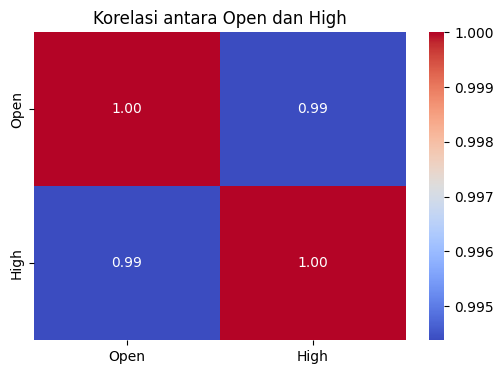

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi antara Open dan High
correlation_matrix = df[['Open', 'High']].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi menggunakan heatmap
fig, ax = plt.subplots(figsize=(6, 4))  # Menentukan ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
ax.set_title('Korelasi antara Open dan High')

# Tampilkan gambar
plt.show()


#### Verifikasi Kualitas Data
data sangat bagus untuk dilakukan prediksi harga beberapa hari kedepan namun data perlu dilakukan preprocessing terlebih dahulu

### Pra-pemrosesan Data (Data Preprocessing)

#### Normalisasi Data

Melakukan scaling menggunakan Min-Max Scaling yaitu mengubah data sehingga semua nilai berada dalam rentang [0, 1] dengan rumus berikut

$$
x' = \frac{x - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
$$

Di mana:

- $x'$ adalah nilai yang dinormalisasi.
- $x$ adalah nilai asli dari fitur.
- $\text{min}(X)$ adalah nilai minimum dari fitur dalam dataset.
- $\text{max}(X)$ adalah nilai maksimum dari fitur dalam dataset.

Min-Max Scaling berguna untuk meningkatkan kinerja model

In [ ]:
# Fungsi untuk membuat data dalam bentuk X (input) dan y (output) dengan sliding window
def create_dataset(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])  # Output adalah data di langkah berikutnya
    return np.array(X), np.array(y)

# Membagi data menjadi input-output untuk model
X, y = create_dataset(scaled_data, time_steps=3)
# Menampilkan bentuk data
print("Shape of X:", X.shape)  # (samples, 3, 2) -> 3 time steps, 2 fitur
print("Shape of y:", y.shape)  # (samples, 2) -> 2 fitur sebagai target


Shape of X: (957, 3, 2)
Shape of y: (957, 2)


In [ ]:
# Membagi data menjadi 80% training dan 20% testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menampilkan bentuk data training dan testing
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (765, 3, 2) (765, 2)
Testing data shape: (192, 3, 2) (192, 2)


In [ ]:
# Membuat model LSTM
model = Sequential()

# Menambahkan lapisan LSTM
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Menambahkan lapisan Dense untuk output
model.add(Dense(units=2))  # Karena kita punya 2 fitur sebagai output (Gula Premium dan Gula Lokal)

# Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,702 (41.80 KB)

 Trainable params: 10,702 (41.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Menampilkan grafik loss selama pelatihan
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1786 - val_loss: 0.0077
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - val_loss: 0.0211
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - val_loss: 0.0123
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0096
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0074
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [ ]:
# Menghitung MSE pada data test
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Prediksi untuk test set
y_pred = model.predict(X_test)

# Denormalisasi hasil prediksi dan data aktual
y_pred_denorm = scaler.inverse_transform(y_pred)
y_test_denorm = scaler.inverse_transform(y_test)

# Menampilkan beberapa hasil prediksi
for i in range(4):
    print(f"Prediksi: {y_pred_denorm[i]}, Aktual: {y_test_denorm[i]}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6815e-04
Test Loss (MSE): 0.0010655425721779466
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Prediksi: [1119.2568 1131.706 ], Aktual: [1060. 1110.]
Prediksi: [1095.751  1096.5056], Aktual: [1060. 1060.]
Prediksi: [1072.3672 1074.7314], Aktual: [1005. 1055.]
Prediksi: [1042.8707 1042.1726], Aktual: [ 970. 1015.]


In [ ]:
import joblib
model.save('lstm_model_sawit.h5')

joblib.dump(scaler, 'scaler_sawit.pkl')

['scaler_sawit.pkl']

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model dan scaler
model = load_model('lstm_model_sawit.h5')
scaler = joblib.load('scaler_sawit.pkl')

# Data terakhir yang akan diprediksi (pastikan data ini dalam format yang benar)
last_input = np.array([ [1000, 1450],
                        [1550, 1500],
                        [1450, 1400]])  # Ambil 3 waktu langkah terakhir sebagai input

# Lakukan scaling pada input terakhir dengan scaler
last_input_scaled = scaler.transform(last_input)

# List untuk menyimpan hasil prediksi
predictions_list = []

# Prediksi untuk 2 hari ke depan
for _ in range(5):  # Prediksi 5 periode (misalnya hari ke-1, ke-2, dst)
    # Melakukan prediksi dengan input yang sudah discale
    prediction = model.predict(last_input_scaled.reshape(1, 3, 2))  # Mengubah bentuk input sesuai yang dibutuhkan LSTM
    prediction_denorm = scaler.inverse_transform(prediction)  # Denormalisasi hasil prediksi
    print(f"Prediksi hari ke-{_+1}: {prediction_denorm}")

    # Menyimpan hasil prediksi dalam list
    predictions_list.append(prediction_denorm.flatten())  # Gunakan flatten agar prediksi berbentuk array 1D

    # Update input dengan prediksi terbaru dan lakukan scaling pada prediksi baru
    last_input_scaled = np.append(last_input_scaled[1:], prediction, axis=0)

# Konversi list hasil prediksi ke dalam array numpy (optional)
predictions_array = np.array(predictions_list)

# Print hasil dalam array numpy
print("Hasil prediksi dalam bentuk array numpy:")
print(predictions_array)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Prediksi hari ke-1: [[1415.4307 1455.3608]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediksi hari ke-2: [[1428.5918 1432.1351]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediksi hari ke-3: [[1417.0659 1435.3285]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediksi hari ke-4: [[1413.3608 1429.0807]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi hari ke-5: [[1408.7208 1424.3613]]
Hasil prediksi dalam bentuk array numpy:
[[1415.4307 1455.3608]
 [1428.5918 1432.1351]
 [1417.0659 1435.3285]
 [1413.3608 1429.0807]
 [1408.7208 1424.3613]]


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Memuat model dan scaler
model = load_model('lstm_model_sawit.h5')
scaler = joblib.load('scaler_sawit.pkl')

# Fungsi prediksi yang digunakan oleh Gradio
def predict_price(input_data):
    """
    Fungsi untuk memprediksi harga saham berdasarkan input data.
    input_data: DataFrame dengan 3 periode waktu dan 2 fitur per periode waktu (Open, High)
    """
    # Memastikan input dalam bentuk numpy array
    last_input = np.array(input_data).reshape(3, 2)  # 3 langkah waktu, 2 fitur per langkah waktu

    # Melakukan scaling pada input terakhir
    last_input_scaled = scaler.transform(last_input)

    # Melakukan prediksi untuk 4 hari ke depan
    predictions_list = []
    for _ in range(4):  # Prediksi untuk 4 hari ke depan
        # Melakukan prediksi dengan input yang sudah discale
        prediction = model.predict(last_input_scaled.reshape(1, 3, 2))  # Bentuk input: (1, 3, 2)

        # Denormalisasi hasil prediksi
        prediction_denorm = scaler.inverse_transform(prediction)

        # Menyimpan hasil prediksi dalam list (flatten untuk menjadikannya array 1D)
        predictions_list.append(prediction_denorm.flatten())  # Gunakan flatten agar prediksi berbentuk 1D

        # Update input dengan prediksi terbaru dan lakukan scaling pada prediksi baru
        last_input_scaled = np.append(last_input_scaled[1:], prediction, axis=0)

    # Mengembalikan hasil prediksi untuk beberapa hari ke depan
    return predictions_list

# Membuat antarmuka dengan Gradio 3.x+
inputs = gr.Dataframe(
    headers=["Open", "High"],
    row_count=3,  # Jumlah baris (3 periode)
    col_count=2,  # Jumlah kolom (2 fitur: Open dan High)
    label="Masukkan Data (3 Periode)"
)

# Output dalam bentuk JSON untuk menampilkan hasil prediksi
outputs = gr.JSON(label="Hasil Prediksi (hari 1-4)")

# Membuat dan menjalankan antarmuka Gradio
gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, live=True).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7c3245a03d3d11c853.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
